# Research Notebook

In this scenario, we have been hired by an electricity network to help process Drone based LiDAR data of 
their electricity lines. Our task is to create a python package that can identify how many wires are present in 
a lidar point cloud and generate 3D catenary models of these wires. 

## Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS
from sklearn.neighbors import NearestNeighbors

from scipy.spatial import distance_matrix
from scipy.spatial.transform import Rotation as R
from scipy.optimize import curve_fit


## Data Exploration

In [53]:
df = pd.read_parquet("data/lidar_cable_points_easy.parquet")
df.head()

,x,y,z
2211,6.196634,-13.157755,10.582272
2905,-10.440643,17.264460,10.926065
1411,2.977432,-3.552676,10.072814
251,5.924494,-10.974960,10.342501
794,-7.062873,12.850664,10.557997


In [69]:
df.shape[0]/400

3.755

In [41]:
df.sort_index().head()

,x,y,z
8,11.761440,-21.560388,11.552047
12,11.657497,-21.424523,11.461258
14,11.696995,-21.316316,11.475524
15,11.619946,-21.315868,11.452441
17,11.559605,-21.222116,11.481411


Text(0.5, 0, 'Z')

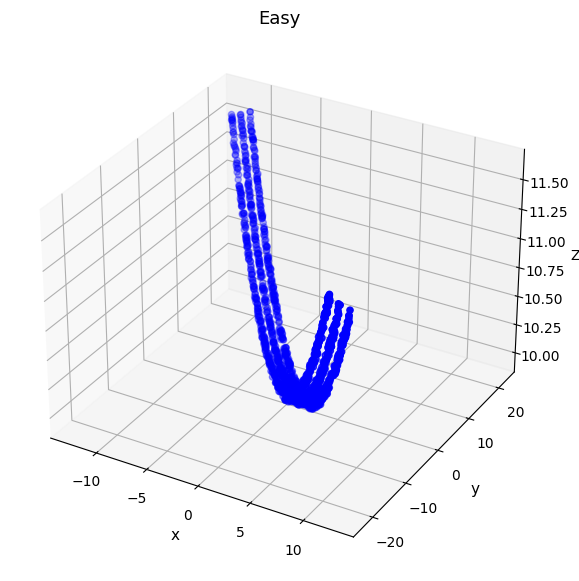

In [54]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c='b')

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

## Data Cleaning 

Text(0.5, 0, 'Z')

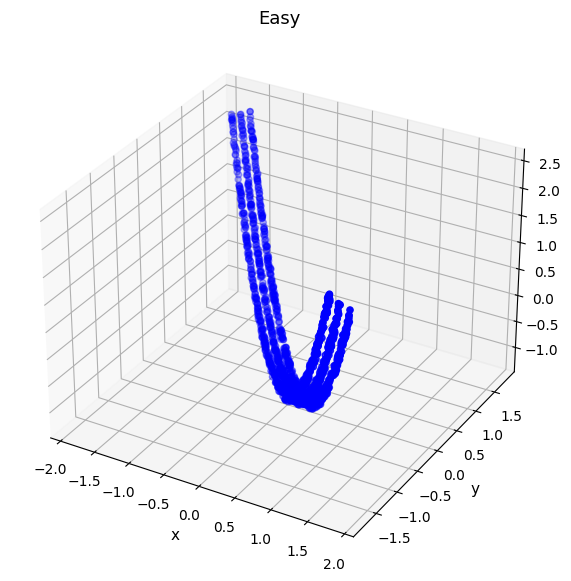

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=["x", "y", "z"])

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df_scaled.x, df_scaled.y, df_scaled.z, c='b')

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

## Clustering

for the number of wire (spectral maybe)

In [157]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)
kmeans.labels_

array([1, 0, 2, ..., 1, 0, 1], dtype=int32)

Text(0.5, 0, 'Z')

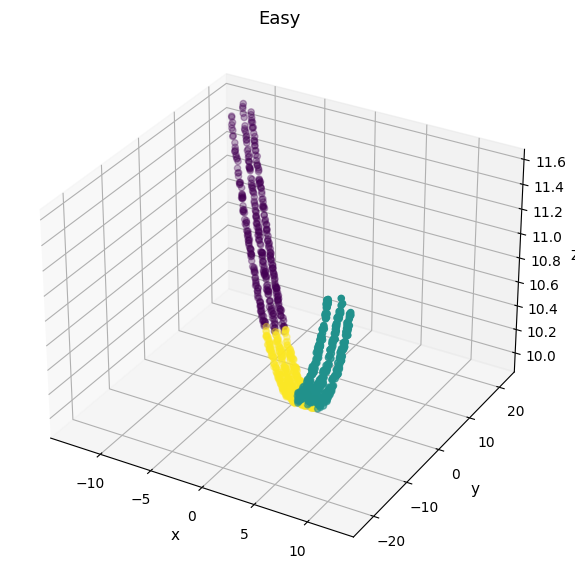

In [158]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=kmeans.labels_)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

Kmeans it s definetely not working but it was easy to predict as it groups points using centroids. If the 3 wires are too close the Kmeans methods, only clusters them in three part. Let's try some spectrale clustering, now, more usefull to find shapes in data like the one we have.

In [163]:
clustering = SpectralClustering(n_clusters=3, assign_labels='cluster_qr', random_state=0).fit(df)
clustering.labels_

array([0, 1, 2, ..., 0, 2, 2])

Text(0.5, 0, 'Z')

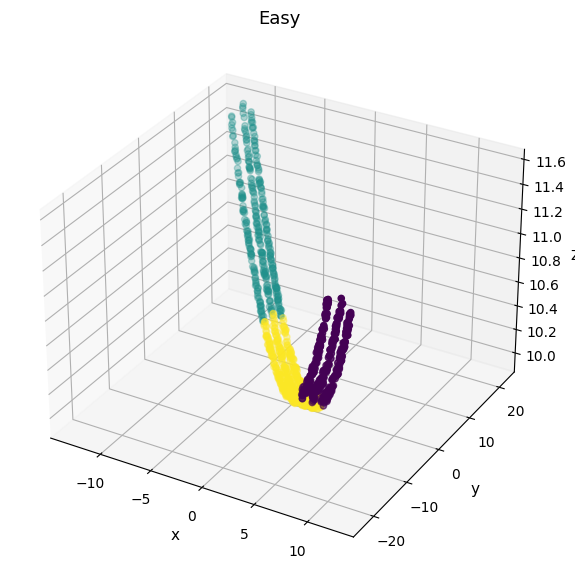

In [164]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=clustering.labels_)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [ ]:
# 1 puis 6.5

In [113]:
clustering = DBSCAN(eps=0.65).fit(df)
clustering.labels_

array([0, 1, 2, ..., 4, 5, 4])

In [114]:
clustering.labels_.max()

13

Text(0.5, 0, 'Z')

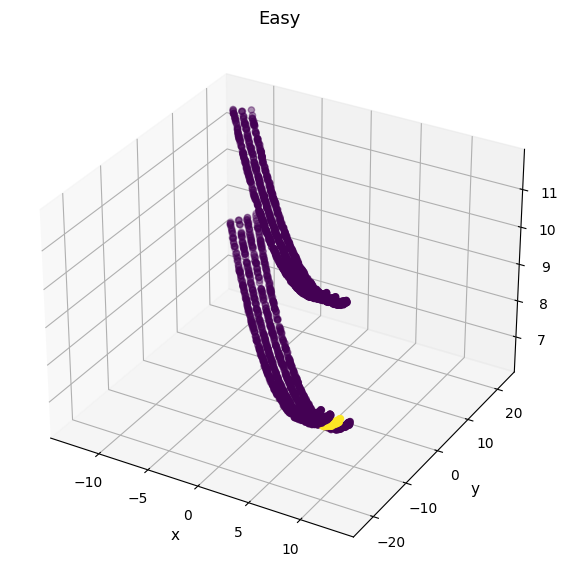

In [105]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=clustering.labels_==6)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [66]:
df.shape[0]/7


400.42857142857144

Text(0.5, 0, 'Z')

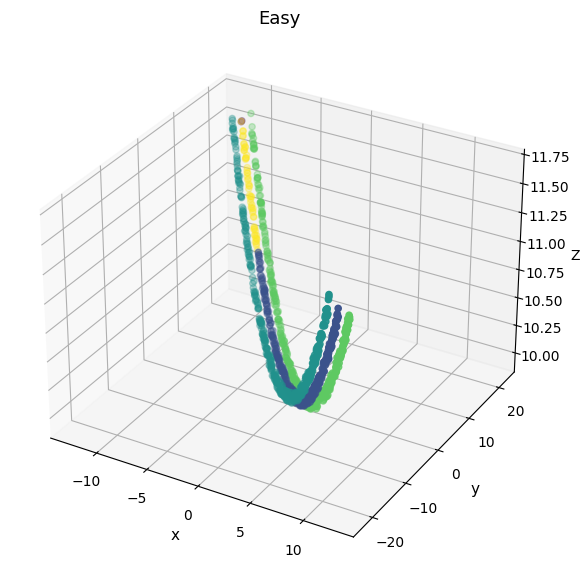

In [60]:
new = df[clustering.labels_==1]
clustering_bis = DBSCAN(eps=0.65).fit(new)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(new.x, new.y, new.z, c=clustering_bis.labels_)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [63]:
clustering_bis.labels_.max()

3

Text(0.5, 0, 'Z')

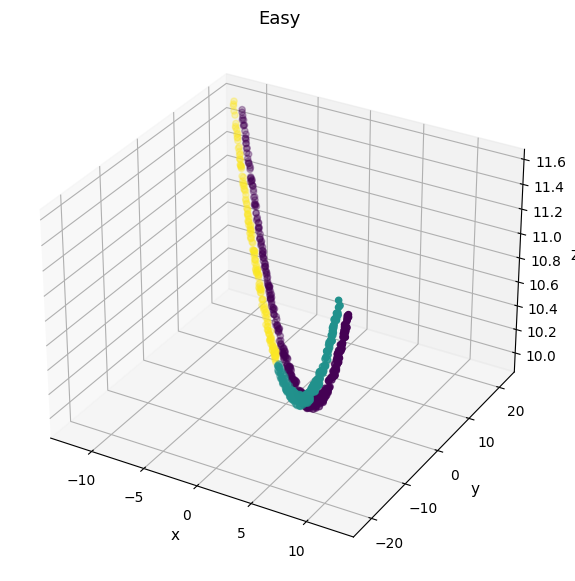

In [197]:
new = df[clustering.labels_==1]
other = DBSCAN(eps=0.65).fit(new)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(new.x, new.y, new.z, c=other.labels_)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [139]:
df.shape

(601, 3)

In [154]:
len(clustering.cluster_hierarchy_)

906

In [172]:
clustering.labels_.max()

376

Text(0.5, 0, 'Z')

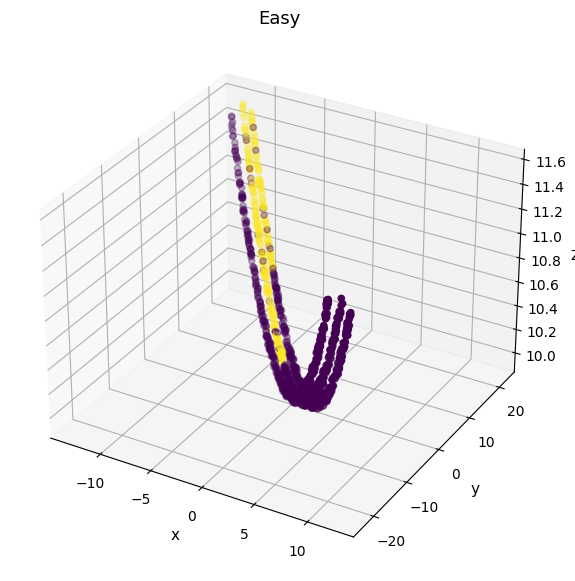

In [176]:
clustering = OPTICS(min_samples=2).fit(df)

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=clustering.labels_>300)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

## Optimal Eps Parameter

In [200]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

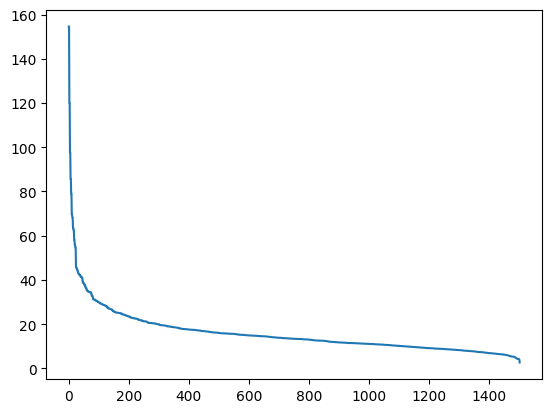

In [201]:
distances = np.sort(distances, axis=0)
distances = 1/distances[:,1]
plt.plot(distances)

In [34]:
test = pd.DataFrame(distance_matrix(df.values, df.values)).describe().transpose()
test.head()

,count,mean,std,min,25%,50%,75%,max
0,1502.0,16.537473,11.653965,0.0,6.251410,14.097037,26.706367,39.544569
1,1502.0,20.888732,13.547221,0.0,8.156501,20.636000,32.551683,45.204603
2,1502.0,12.772103,7.779868,0.0,6.221629,12.017374,18.665615,29.647090
3,1502.0,15.365331,10.868085,0.0,6.178787,12.300422,24.646153,37.513700
4,1502.0,16.944706,11.753503,0.0,6.303690,15.149606,27.042937,39.728475


In [37]:
(test["75%"] / test["max"]).mean()

0.6741322646119088

In [33]:
14/39

0.358974358974359

In [203]:
from sklearn.metrics import silhouette_score

eps = {}
for i in np.linspace(0.6, 0.7, 14):
    clustering = DBSCAN(eps=i).fit(df)
    clustering.labels_
    score = silhouette_score(df, clustering.labels_)
    eps[round(i, 2)] = score

In [206]:
min(eps, key=eps.get)

0.6

In [71]:
clustering = DBSCAN(eps=1).fit(df)
clustering.labels_

small_df = df[clustering.labels_==0]
for i in np.linspace(0.1, 1, 15):
    clustering = DBSCAN(eps=i).fit(small_df)
    clustering.labels_
    score = silhouette_score(small_df, clustering.labels_)
    print(round(i, 2), score)

0.1 -0.7489622508109118
0.16 -0.5492959379956904
0.23 0.03646137941704755
0.29 0.2642908119121794
0.36 0.10369128499700955
0.42 -0.11770174643429875
0.49 -0.2354344814279388
0.55 -0.4192789889355207
0.61 -0.361093232479636
0.68 -0.3213528613825458
0.74 -0.24886382946690624


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Text(0.5, 0, 'Z')

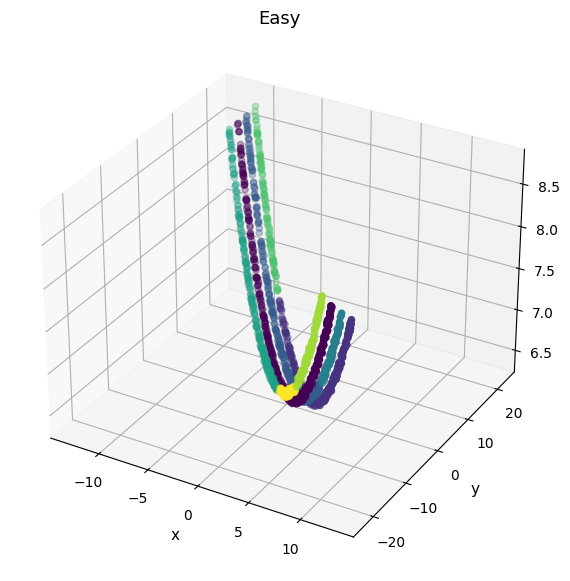

In [81]:
clustering = DBSCAN(eps=0.7).fit(small_df)
clustering.labels_

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(small_df.x, small_df.y, small_df.z, c=clustering.labels_)

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

## Find Wire Plan

In [44]:
one_wire = df[clustering.labels_==0]
one_wire.head()

,x,y,z
2211,6.196634,-13.157755,10.582272
2905,-10.440643,17.264460,10.926065
2573,-2.509187,2.693062,9.980147
2439,0.745064,-3.172704,10.060129
2378,2.182173,-5.843243,10.087963


In [45]:
def plan(x, a, b):
    y = a * x + b 
    return y

In [49]:
parameters, covariance = curve_fit(plan, one_wire.x, one_wire.y)
parameters

array([-1.83080568, -1.83127831])

Text(0.5, 0, 'Z')

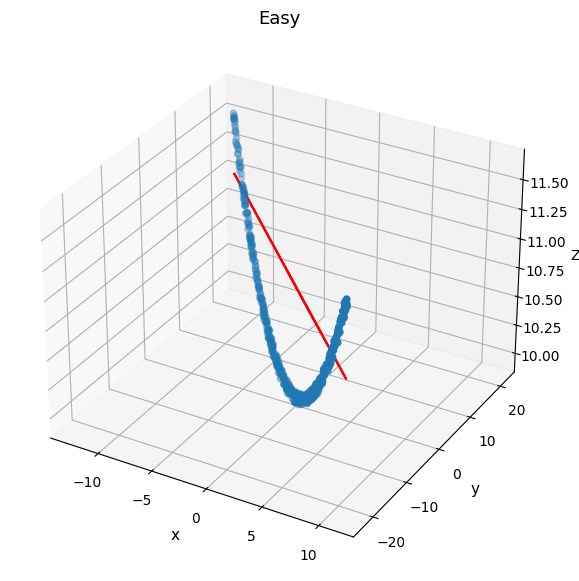

In [52]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(one_wire.x, one_wire.y, one_wire.z)
ax.plot(one_wire.x, plan(one_wire.x, -1.83, -1.831), zs=11, c='r', zdir='z', label='plan (x, y)')

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [86]:
one_wire.min()

x   -12.749286
y   -22.386120
z     9.955216
dtype: float64

In [90]:
angle =  np.rad2deg(np.arctan(1.83))
angle

61.345685938072826

In [91]:
r = R.from_euler('z', 61.345, degrees=True)

Text(0.5, 0, 'Z')

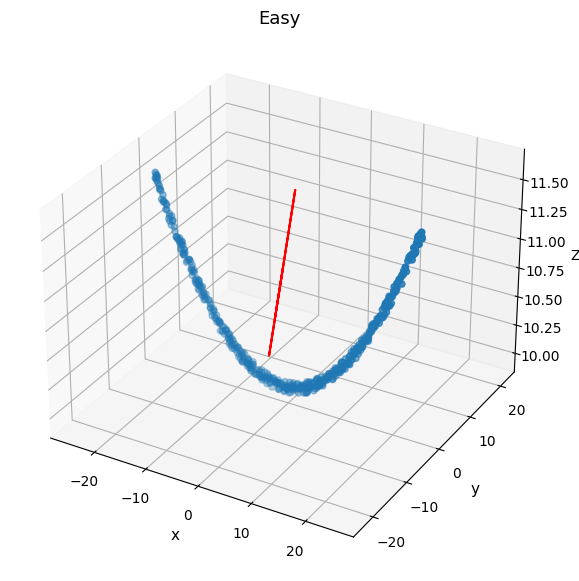

In [92]:
df_rotated = pd.DataFrame(r.apply(one_wire), columns=["x", "y", "z"])

fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df_rotated.x, df_rotated.y, df_rotated.z)
ax.plot(one_wire.x, plan(one_wire.x, -1.83, -1.831), zs=11, c='r', zdir='z', label='plan (x, y)')

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)


In [107]:
df_rotated.mean()

x     0.364997
y    -0.877916
z    10.524044
dtype: float64

## 2D Catenary Models

In [95]:
# Define the catenary function
def catenary(x, xo, zo, c):
    z = zo + c * (np.cosh((x-xo)/c)-1)
    return z

In [96]:
parameters, covariance = curve_fit(catenary, df_rotated.x, one_wire.z)

In [97]:
parameters

array([ -0.49440555,  10.00164653, 199.69728531])

In [108]:
X = np.linspace(-25, 25, num=200)
Y = np.zeros(200) - 0.877916
Z = catenary(X,  -0.49440555,  10.00164653, 199.69728531)

prediction = pd.DataFrame(np.transpose([X, Y, Z]), columns=["x", "y", "z"])
prediction.head()

,x,y,z
0,-25.000000,-0.877916,11.507120
1,-24.748744,-0.877916,11.476370
2,-24.497487,-0.877916,11.445937
3,-24.246231,-0.877916,11.415823
4,-23.994975,-0.877916,11.386028


In [10]:
np.sqrt(prediction.x**2+prediction.y**2)

NameError: name 'np' is not defined

In [109]:
r = R.from_euler('z', -61.345, degrees=True)
prediction = pd.DataFrame(r.apply(prediction), columns=["x", "y", "z"])
prediction.head()

,x,y,z
0,-12.758753,21.517086,11.507120
1,-12.638267,21.296602,11.476370
2,-12.517780,21.076119,11.445937
3,-12.397294,20.855636,11.415823
4,-12.276808,20.635153,11.386028


## PCA from 3D to 2D

## 3D Visualisations 

Text(0.5, 0, 'Z')

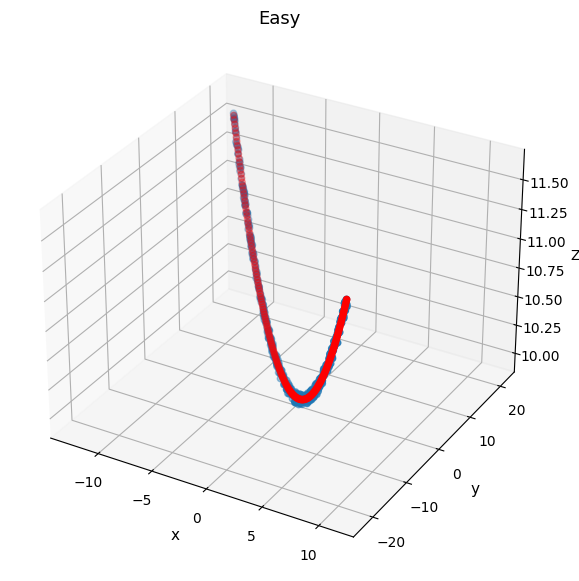

In [110]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(one_wire.x, one_wire.y, one_wire.z)
ax.scatter(prediction.x, prediction.y, prediction.z, c="r")

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [13]:
Z

array([[30000.        , 29402.10182634, 28820.5285175 , ...,
        48012.44770942, 48998.0614223 , 50000.        ],
       [29402.10182634, 28800.12243649, 28214.46791144, ...,
        47018.67156413, 48000.20406081, 48998.0614223 ],
       [28820.5285175 , 28214.46791144, 27624.73217019, ...,
        46041.22028364, 47018.67156413, 48012.44770942],
       ...,
       [48012.44770942, 47018.67156413, 46041.22028364, ...,
        27624.73217019, 28214.46791144, 28820.5285175 ],
       [48998.0614223 , 48000.20406081, 47018.67156413, ...,
        28214.46791144, 28800.12243649, 29402.10182634],
       [50000.        , 48998.0614223 , 48012.44770942, ...,
        28820.5285175 , 29402.10182634, 30000.        ]])

## Industrialization

In [2]:
%load_ext autoreload
%autoreload 2

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from wire_detect.helper import get_labels, get_eps_by_iteration, get_eps
from wire_detect.equation import plan, catenary2d, rotate, catenary3d, rmse
from wire_detect.rotation import rotate_matrix


df = pd.read_parquet("data/lidar_cable_points_hard.parquet")
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=["x", "y", "z"])

eps = get_eps(df)
print(eps)

labels = get_labels(df, eps=eps)
print(max(labels))
print()

for label in range(3): # range(max(labels)+1):
    print(label)
    one_wire = df[labels==label]
    [a, b], _ = curve_fit(plan, one_wire.x, one_wire.y)
    angle = np.rad2deg(np.arctan(-a))
    one_wire = rotate_matrix(one_wire, angle)
    [xo, zo, c], _ = curve_fit(catenary2d, one_wire.x, one_wire.z)
        
    X = np.linspace(one_wire.x.min(), one_wire.x.max(), num=200)
    Y = np.zeros(200) + one_wire.y.mean()
    Z = catenary2d(X, xo, zo, c)
    print(one_wire.y.mean())
    
    prediction = pd.DataFrame(np.transpose([X, Y, Z]), columns=["x", "y", "z"])
    prediction = rotate_matrix(one_wire, -angle)
    
    # xo = rotate(xo, one_wire.y.mean(), -angle)
    yo = b
    
    prediction["Y"] = plan(prediction["x"], a, b)
    y_rmse = rmse(prediction["y"], prediction["Y"])
    prediction["Z"] = catenary3d(prediction["x"], prediction["Y"], xo, yo, zo, c)
    z_rmse = rmse(prediction["z"], prediction["Z"])
    
    print(y_rmse, z_rmse)
    
    
    one_wire = df[labels==label].copy()
    one_wire["Y"] = plan(one_wire["x"], a, b)
    y_rmse = rmse(one_wire["y"], one_wire["Y"])
    one_wire["Z"] = catenary3d(one_wire["x"], one_wire["Y"], xo, yo, zo, c)
    z_rmse = rmse(one_wire["z"], one_wire["Z"])
    
    # yo = b 
    xo = (b - xo*np.sin(-angle/180))/np.cos(-angle/180)
    print(y_rmse, z_rmse)
    
    print(xo, yo, zo, a, b, c)
    
    
    



0.6518845528002851
0

0
-1.422415522398287e-17
0.11530222103417781 1.245943464606572
0.1153022210341778 1.2459434646065717
-0.015848701887023513 1.4608592113773966e-10 -1.0225041615406074 -0.9933304571843375 1.4608592113773966e-10 1.1976580388292295
1


ValueError: `ydata` must not be empty!

In [124]:
xo*np.cos(angle/180) + -0.00014004505510013956+np.sin(angle/180)

0.32105888959287243

In [65]:
from wire_detect.detector import Detector

test_detector = Detector(df, eps=0.05)

In [170]:
test_detector.find_plan_coefficient()

2.7450501577453803 2.7023484570055474 0.042701700739832926
0.001580744578818405 0.07845035519803545 0.07686961061921704
0.9163629923875793 0.9333283670614967 0.016965374673917344
0.9163629923875793 0.9031106414429995 0.013252350944579883
-2.750510762459575 -2.764882718047874 0.01437195558829929
-2.750510762459575 -2.729248923353431 0.021261839106143654


In [22]:
from collections import Counter

dict(Counter(test_detector.labels))


{0: 379, 1: 397, 2: 417, -1: 8}

In [18]:
min_cluster_size = 50
for key in Counter(test_detector.labels):
    value = Counter(test_detector.labels)[key]
    if value < min_cluster_size:
        print(key)
        test_detector.labels[test_detector.labels==key] == np.nan

3


In [19]:
dict(Counter(test_detector.labels))

{0: 379, 1: 397, 2: 417, 3: 8}

In [9]:
rotate(1, 2, 3)

[0.9665293241812118, 2.016388123724649]

In [25]:
rmse(
    np.array([-1.8315895449468216, -1.8301816526460877]),
    np.array([-1.8302488415643627, 1.826984999062111]))

2.586007513122508

In [168]:
test_detector.plans

[(-1.830071776540218, -0.9191521141632966),
 (-1.8295035120536176, 2.7450501577453803),
 (-1.8309392836924383, 0.001580744578818405),
 (-1.830385016440953, 0.9163629923875793),
 (-1.8304633773351142, -1.8293416946565288),
 (-1.8303415101520395, 1.8334634710639994),
 (-1.8326989952040302, 0.9333283670614967),
 (-1.8308530356537547, -2.750510762459575),
 (-1.8317106909853107, 0.9031106414429995),
 (-1.834844824311601, 2.7023484570055474),
 (-1.8270662327124938, -2.764882718047874),
 (-1.8215566082277719, 0.07845035519803545),
 (-1.8332379628464515, -2.729248923353431)]

In [150]:
# TODO: find a way to determine the right threshold 
threshold = 0.1
labels = test_detector.labels
plans = test_detector.plans
new_labels, already_added = [], []
for label in range(max(labels)+1):
    if not label in already_added:
        new_labels.append([label])
        a, b = plans[label]
        for second_label in range(label+1, max(labels)+1):
            second_a, second_b = plans[second_label]
            if (abs(a - second_a) < 0.1) and (abs(b - second_b) < 0.1):
                new_labels[label].append(second_label)
                already_added.append(second_label)
                print(b, second_b, abs(b-second_b))
    else:
        new_labels.append([])
        
new_labels = list(filter(lambda a: a != [], new_labels))
for label in new_labels:
    if len(label) > 0:
        for element in label[1:]:
            labels[labels == element] = label[0]


2.7450501577453803 2.7023484570055474 0.042701700739832926
0.001580744578818405 0.07845035519803545 0.07686961061921704
0.9163629923875793 0.9333283670614967 0.016965374673917344
0.9163629923875793 0.9031106414429995 0.013252350944579883
-2.750510762459575 -2.764882718047874 0.01437195558829929
-2.750510762459575 -2.729248923353431 0.021261839106143654


In [152]:
labels.max()

7

In [141]:
labels

In [147]:
list(filter(lambda a: a != [], new_labels))

[[0], [1, 9], [2, 11], [3, 6, 8], [4], [5], [7, 10, 12]]

In [35]:
test_detector.find_catenary_coefficient()

In [36]:
test_detector.create_wire()

In [44]:
test_detector.make_prediction()

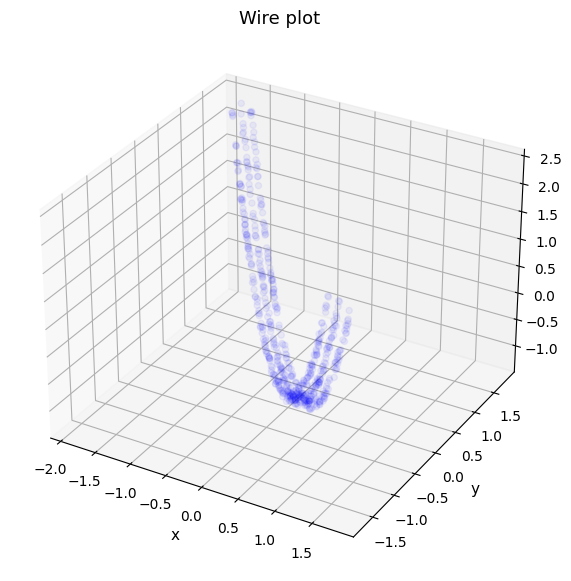

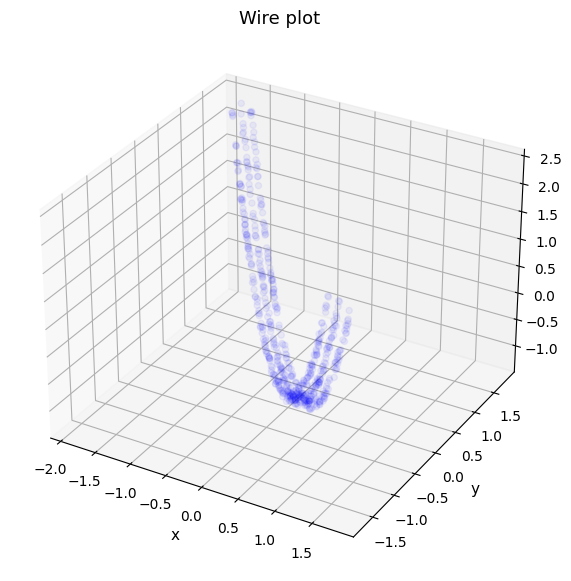

In [66]:
test_detector.plot_both()

In [181]:
test_detector.scores

[(0.06095854654167235, 0.4298794404528893),
 (0.06007199920270659, 0.4354729604237091),
 (0.05966633858822029, 0.29695875545333444),
 (0.06083594718328257, 0.41221685584376444),
 (0.05804401524771061, 0.3089043995713106),
 (0.05912135622591037, 0.30144200334021837),
 (0.05716270400789493, 0.43122236479692094)]

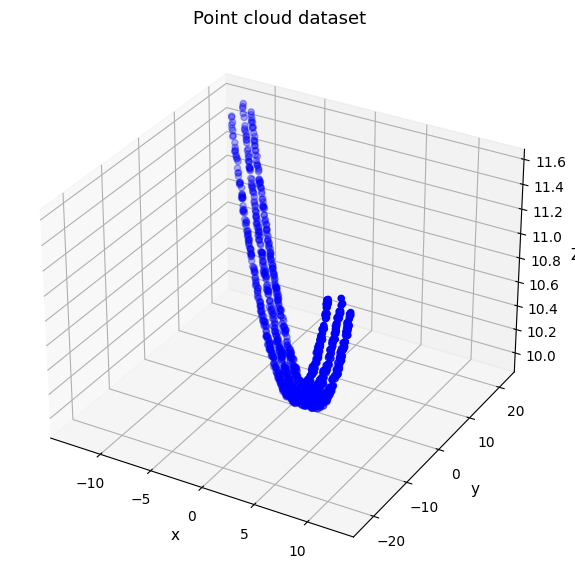

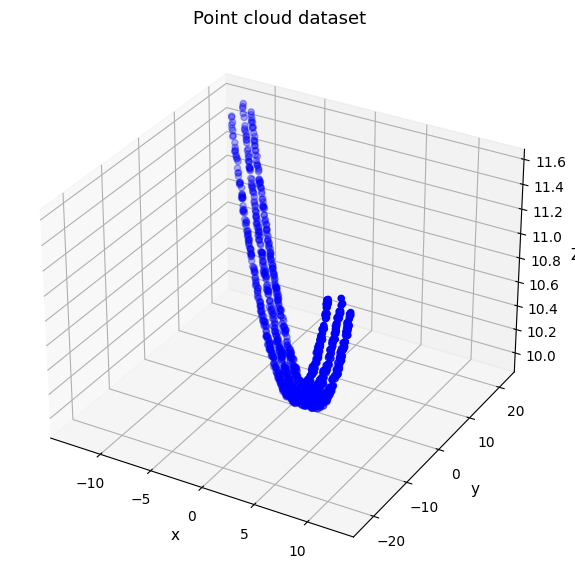

In [217]:
test_detector.plot_dataset()

In [133]:
plan(one_wire["x"], a, b)

251   -10.840966
794    12.923393
408    -4.005703
52    -19.609286
612     4.967631
         ...    
892    17.278871
780    12.244094
159   -15.032450
61    -19.328582
849    15.283057
Name: x, Length: 514, dtype: float64

In [51]:
one_wire = df[labels==2].copy()
one_wire["Y"] = a * one_wire["x"] + b
one_wire["Y"] = plan(one_wire["x"], a, b)
# one_wire["Z"] = catenary3d(one_wire["x"], one_wire["Y"], -0.3474143474026473, b, zo, c, angle)
one_wire["Z"] = zo + c*(np.cosh((one_wire["x"]*np.cos(angle/180) + one_wire["Y"]*np.sin(angle/180) - 0.3474)/c)-1)

one_wire.head()

,x,y,z,Y,Z
251,5.925292,-10.927853,10.407309,-10.850983,10.082434
52,10.776690,-19.660811,11.213008,-19.718402,10.104836
44,10.900768,-20.057897,11.343672,-19.945192,10.105605
289,5.053228,-9.231253,10.241258,-9.257020,10.079989
296,4.841004,-8.973925,10.237361,-8.869115,10.079467


In [135]:
np.sqrt(((one_wire["y"] - one_wire["Y"])**2).mean())

0.06104612651462316

In [137]:
np.sqrt(((one_wire["z"] - one_wire["Z"])**2).mean())

0.30031310989870413

In [101]:
rotate(one_wire["x"], on["Y"], angle)

0      1.345342
1     -2.945894
2      0.111068
3      2.928677
4     -1.509287
         ...   
509   -3.732382
510   -2.823230
511    2.102217
512    2.877989
513   -3.371989
Length: 514, dtype: float64

In [76]:
rotate(prediction["x"],)

0       224.008311
1      1713.251522
2        11.418998
3      1709.925512
4       282.719224
          ...     
509    3981.037664
510    1494.717280
511     650.604171
512    1616.505837
513    2720.325281
Length: 514, dtype: float64

In [83]:
prediction["Y"] = a*prediction["x"] + b 
prediction["Z"] = zo + c*(np.cosh((prediction["x"]*np.cos(-angle/180) + prediction["y"]*np.sin(-angle/180)+b/a*np.cos(-angle/180)-b*np.sin(-angle/180)))/c)-1)
prediction["F"] = catenary3d(prediction["x"], prediction["Y"], -b/a, b, zo, c, angle)

In [85]:
((prediction["z"] - prediction["F"])**2).mean()

0.42784561631046364

In [13]:
prediction.sort_values("x", inplace=True)

Text(0.5, 0, 'Z')

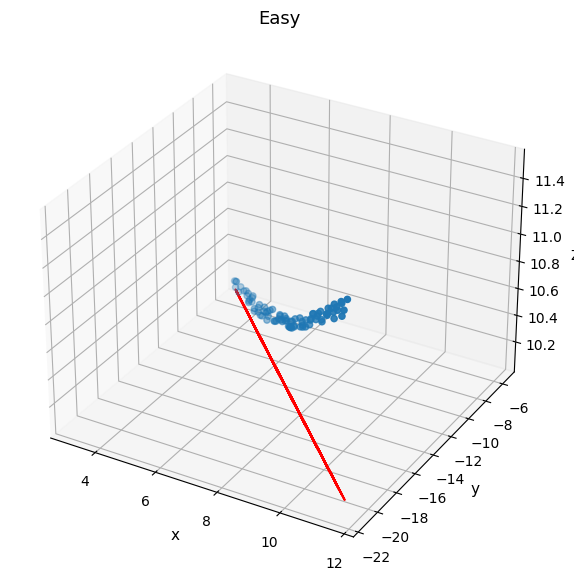

In [52]:

# one_wire = df[labels==2]
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(one_wire.x, one_wire.y, one_wire.z)
ax.plot(one_wire.x, one_wire.Y, one_wire.Z, c="r")

ax.set_title("Easy", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)

In [14]:
one_wire = df[labels==label]
np.sqrt(one_wire.x**2+one_wire.y**2)

251    12.471944
794    14.663688
408     4.601062
52     22.369237
612     5.639334
         ...    
892    19.666090
780    14.015985
159    17.070915
61     21.981853
849    17.479750
Length: 514, dtype: float64

In [15]:
np.sqrt(prediction.x**2+prediction.y**2)

0      12.471944
1      14.663688
2       4.601062
3      22.369237
4       5.639334
         ...    
509    19.666090
510    14.015985
511    17.070915
512    21.981853
513    17.479750
Length: 514, dtype: float64

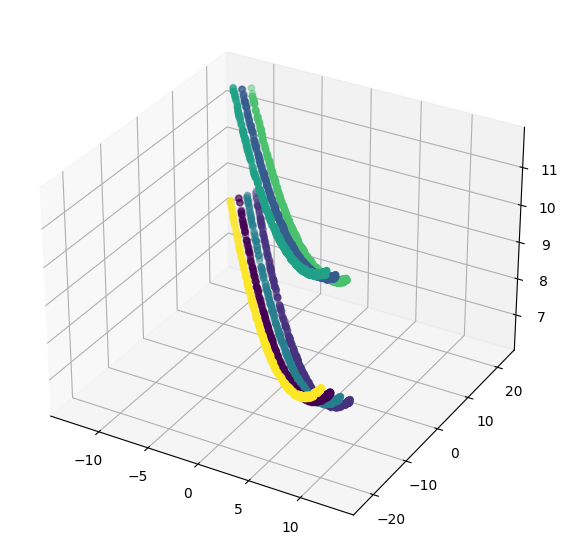

In [167]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=labels)


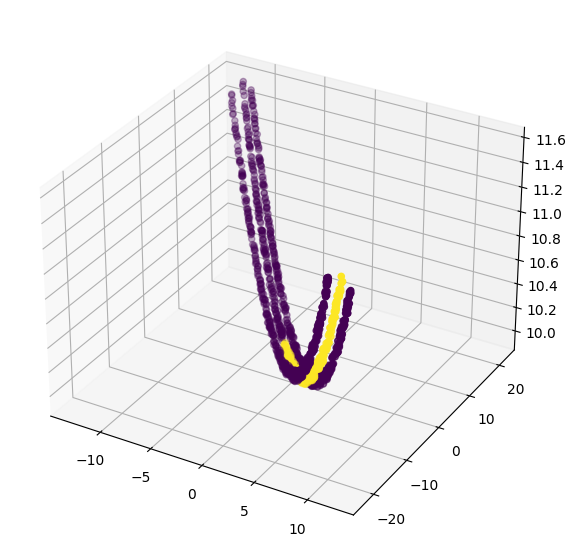

In [222]:
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter(df.x, df.y, df.z, c=test_detector.labels==2)

In [224]:
catenary3d(1, 2, 3, 4, 5, 6)

4.15283476851212

lidar_cable_points_extrahard.parquet
[(0.3014346161960306, 0.28663833214107115), (0.24225097932211545, 0.29623253305072456), (0.14758992913895713, 0.2901096029232303)]

lidar_cable_points_medium.parquet
[(0.06095854654167235, 0.4298794404528893), (0.06007199920270659, 0.4354729604237091), (0.05976052171619627, 0.29408967901516303), (0.06083594718328257, 0.41221685584376444), (0.13315379804997154, 0.5382883638439068), (0.05912135622591037, 0.30144200334021837), (0.05706585597781826, 0.4336309017862232)]

lidar_cable_points_hard.parquet
[(0.05855334959357617, 0.22199337608631717), (0.059259711305851136, 0.2091559074293451), (0.06093699793241599, 0.26355478079135913)]

lidar_cable_points_easy.parquet
[(0.05894933052910707, 0.31832465276292654), (0.061298498853197304, 0.30294298908523987), (0.06104612651462316, 0.30019351339551287)]



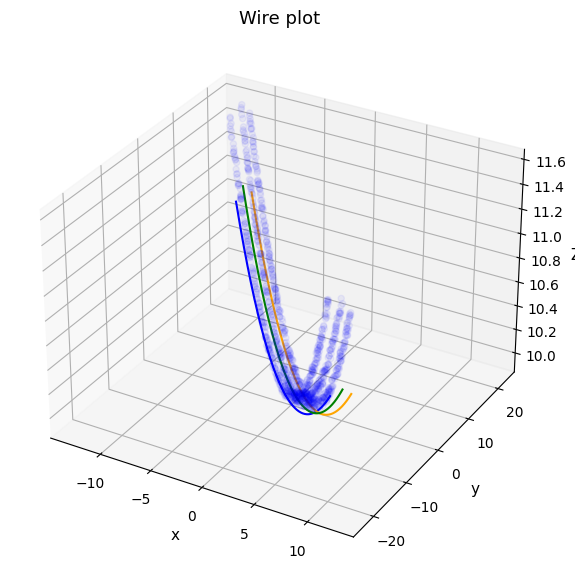

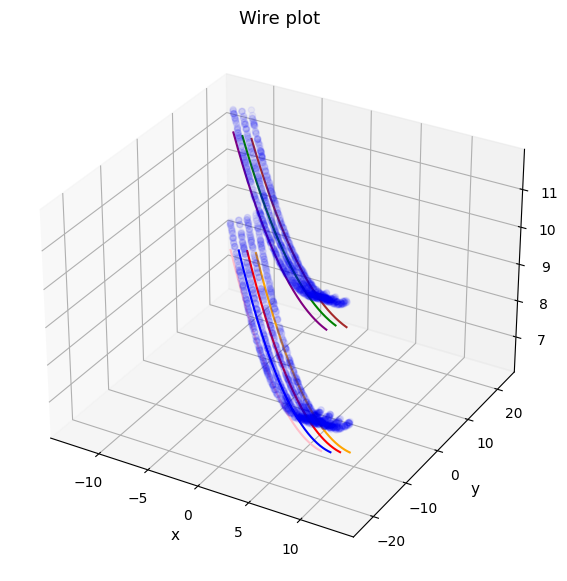

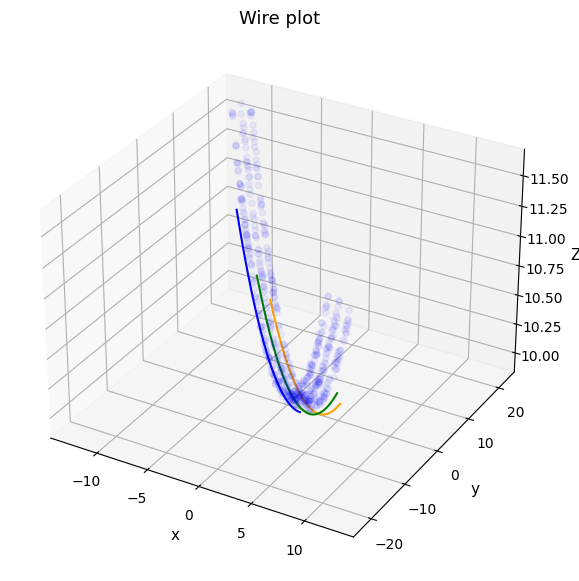

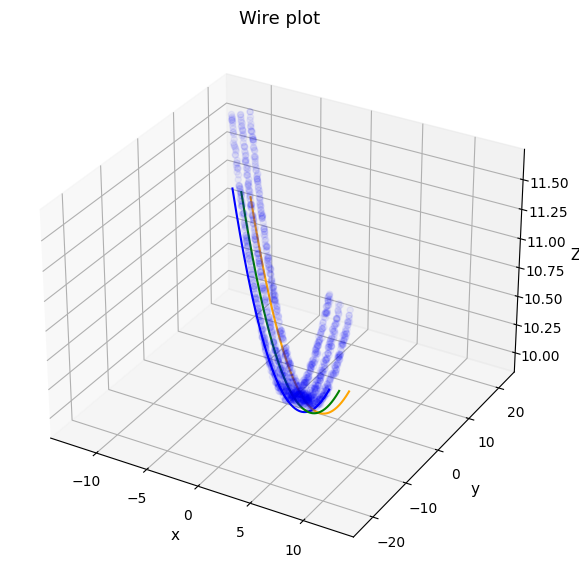

In [40]:
import os 


for file in os.listdir("data"):
    if file[-8:] == ".parquet":
        print(file)
        df = pd.read_parquet("data/"+file)
        test_detector = Detector(df, eps=0.65)
        fig = test_detector.plot_both()
        fig.savefig("data/images/"+file[:-8]+".png")
        print(test_detector.scores)
        print()